In [1]:
import opacities as op
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
mixedGrain=op.mixedGrain("./../new_cons/Normal_silicates/")

<IPython.core.display.Javascript object>


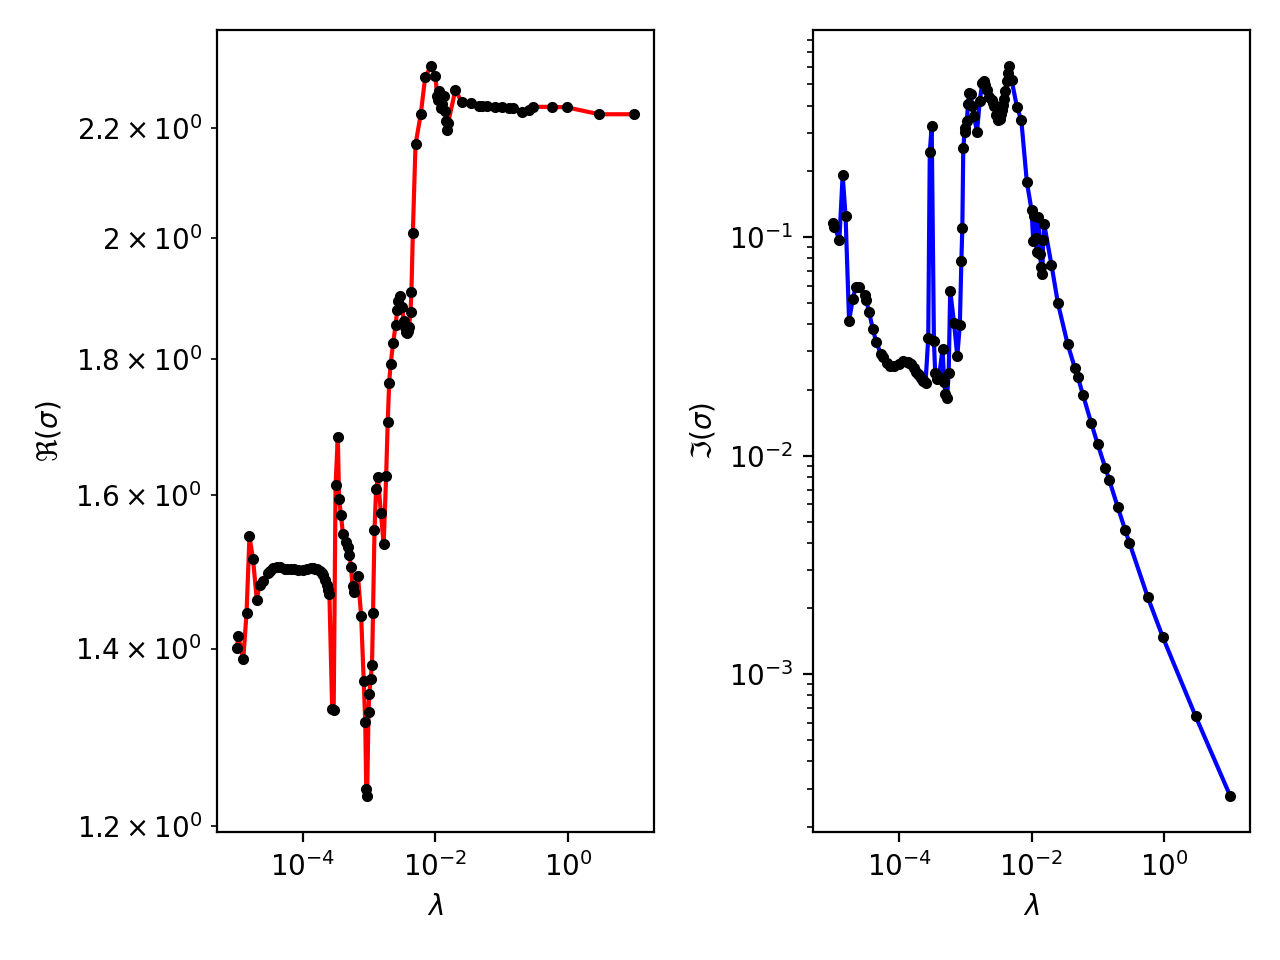

In [3]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlabel("$\lambda$")
ax1.set_ylabel("$\Re(\sigma)$")
ax2.set_xlabel("$\lambda$")
ax2.set_ylabel("$\Im(\sigma)$")
ax1.loglog(mixedGrain.lambdas,np.real(mixedGrain.conductivities),'r-')
ax1.loglog(mixedGrain.lambdas,np.real(mixedGrain.conductivities),'k.')
ax2.loglog(mixedGrain.lambdas,np.imag(mixedGrain.conductivities),'b-')
ax2.loglog(mixedGrain.lambdas,np.imag(mixedGrain.conductivities),'k.')
plt.tight_layout()

In [4]:
def mrn_pollack(r):
    P0=0.005e-4
    if(r>=5e-4):
        return 0.
    if(r<5e-4):
        if(r>=1e-4):
            return (1/P0)**2*(P0/r)**5.5
        if(r<1e-4):
            if(r>=P0):
                return (P0/r)**3.5
            if(r<P0):
                return 1.
            
def sizes_distr(smin,smax,ndust):
    sdust = np.zeros(ndust)
    sdb=np.logspace(np.log10(smin),np.log10(smax),ndust+1)
    for i in range(ndust):
        sdust[i]=np.sqrt(sdb[i]*sdb[i+1])
    return [sdust,sdb]
def mrn_d(dust_to_gas_ratio,smin,smax,mrn,ndust):
    Anorm =epsilon_0/(smax**(4.0+mrn)-smin**(4.0+mrn))
    sdb = np.zeros(ndust+1)
    sdust = np.zeros(ndust)
    epsilondust = np.zeros(ndust)
    for i in range(0,ndust+1):
        sdb[i]=10.0**(np.log10(smax/smin)*float(i)/float(ndust)+np.log10(smin))
    for i in range(0,ndust):
        epsilondust[i]= Anorm *(sdb[i+1]**(4.0+mrn)-sdb[i]**(4.0+mrn))
    return epsilondust

ndust=500 #number of dust species
smin =5e-7 # Min grain size
smax =2.5e-5 # Max grain size

epsilon_0=0.01#3986 #Dust-to-gas ratio from Semenov
sdust,sdb=sizes_distr(smin,smax,ndust) 
mrn       =  -3.5
sdust,sdb =  sizes_distr(smin,smax,ndust) 
rho_n=mrn_d(epsilon_0,smin,smax,mrn,ndust)

#plt.figure()
#plt.loglog(sdust,rho_n)

In [5]:
dist=op.dustDistribution(sdust,rho_n)

In [6]:
opacities=op.opacity(length=113)

In [7]:
opacities.calculate_opacity(grainProperties=mixedGrain, dustDistribution=dist)

<IPython.core.display.Javascript object>


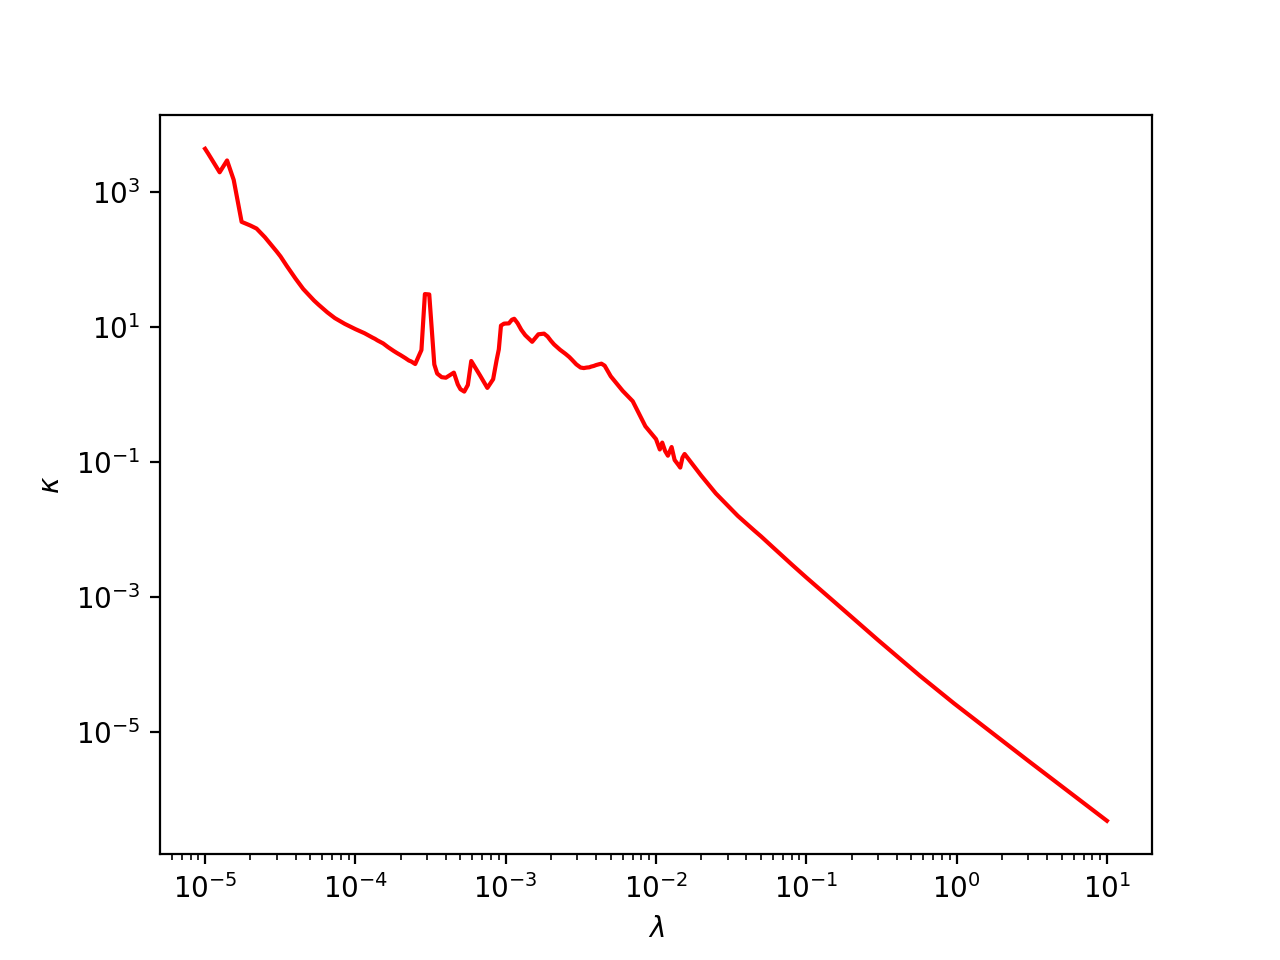

In [8]:
plt.figure()
plt.xlabel("$ \lambda $")
plt.ylabel("$\kappa$")
plt.loglog(mixedGrain.lambdas,opacities.data,'r')
